# Parte 1: Preparación de los Datos

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)

## Cargar el documento “data/balance.csv” y almacenarlo como un dataframe

In [78]:
df=pd.read_csv("data/balance.csv", index_col=0)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Hacer una matriz de dispersión de las variables. 
## Comentar la distribución de las variables
## Describir las relaciones entre las variables numéricas y Balance

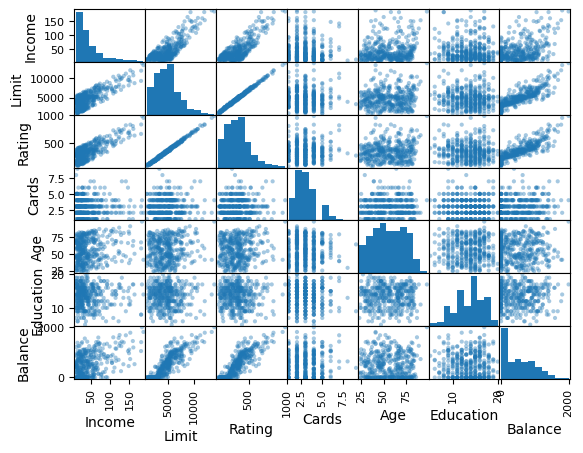

In [79]:
pd.plotting.scatter_matrix(df, alpha=0.4);

### Dado que Gender, Married y Student son variables booleanas, convierta las columnas en 1s y 0s.


In [80]:
data=df.copy()
data['Gender'] =data.Gender.replace({' Male':0,'Female':1})
data["Married"]=data.Married.replace({'Yes':1,'No':0})
data["Student"]=data.Student.replace({'Yes':1,'No':0})
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,0,1,Caucasian,333
2,106.025,6645,483,3,82,15,1,1,1,Asian,903
3,104.593,7075,514,4,71,11,0,0,0,Asian,580
4,148.924,9504,681,3,36,11,1,0,0,Asian,964
5,55.882,4897,357,2,68,16,0,0,1,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,0,0,1,Caucasian,560
397,13.364,3838,296,5,65,17,0,0,0,African American,480
398,57.872,4171,321,5,67,12,1,0,1,Caucasian,138
399,37.728,2525,192,1,44,13,0,0,1,Caucasian,0


### Ethnicity es una variable categórica que tiene más de 2 categorías, convertir las categorías dentro de la variable en columnas separadas con respuestas binarias. (get_dummies)
### Eliminar la variable ficticia “African”.

In [82]:
dummies=pd.get_dummies(data['Ethnicity'])
data=pd.concat([data,dummies],axis=1).drop(['Ethnicity','African American'],axis=1)
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,0,0,1,333,0,1
2,106.025,6645,483,3,82,15,1,1,1,903,1,0
3,104.593,7075,514,4,71,11,0,0,0,580,1,0
4,148.924,9504,681,3,36,11,1,0,0,964,1,0
5,55.882,4897,357,2,68,16,0,0,1,331,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,0,0,1,560,0,1
397,13.364,3838,296,5,65,17,0,0,0,480,0,0
398,57.872,4171,321,5,67,12,1,0,1,138,0,1
399,37.728,2525,192,1,44,13,0,0,1,0,0,1


# Parte 2: Ajustar el modelo
### Dividir los datos en conjuntos de entrenamiento y prueba

In [83]:
X,y=data.drop(['Balance'],axis=1),data["Balance"]
y

1      333
2      903
3      580
4      964
5      331
      ... 
396    560
397    480
398    138
399      0
400    966
Name: Balance, Length: 400, dtype: int64

In [84]:
X_train, X_test, y_train, y_test= train_test_split(X,y, shuffle=True, test_size=0.25)

### Utilizar todas las variables, ajuste un modelo de regresión lineal para predecir el Balance. 

In [85]:
model=LinearRegression()
regressor=model.fit(X_train, y_train)
yhat=regressor.predict(X_test)

### Utilizar “score” para obtener el valor de la prueba R-cuadrado.

In [86]:
r2_score(y_test,yhat)

0.9526164373174173

### Elaborar un gráfico de los valores verdaderos vs predichos.

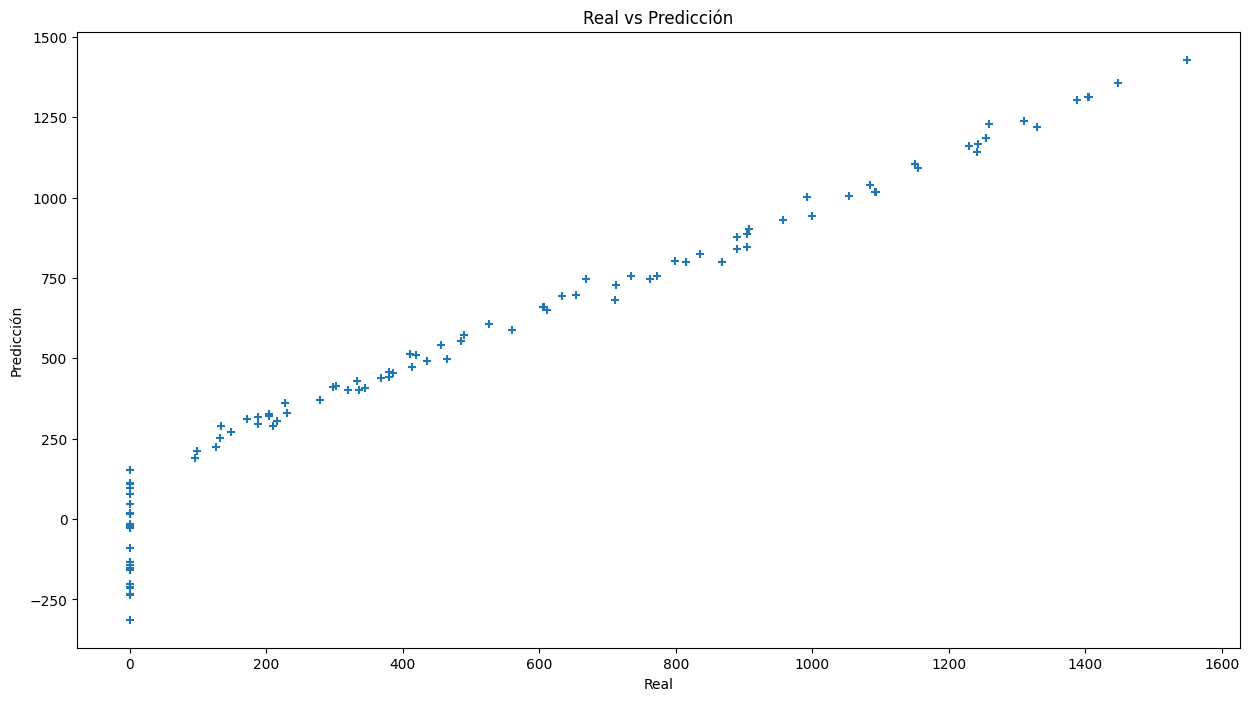

In [87]:
fig, ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,yhat, marker="+")
ax.set_title("Real vs Predicción")
ax.set_ylabel("Predicción")
ax.set_xlabel("Real");

### La abundancia de observaciones en 0 de equilibrio está afectando a la forma en que el modelo se ajusta a los datos. 
### Elaborar el histograma para el Balance, con bins=100. 
### Esta abundancia de observaciones cargadas en 0 está afectando el ajuste. 

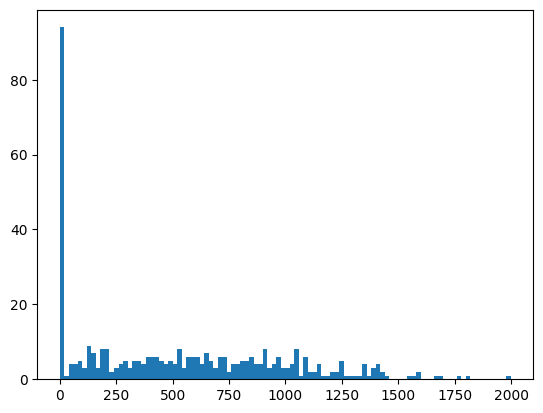

In [88]:
plt.hist(data.Balance, 100);

## Parte 3: Clasificador y regresor
### Modificar el dataset inicial para gregar una nueva columna llamada “Is_Zero” que contenga “Verdadero” o “Falso” a partir del balance y guardar como un dataset diferente.

In [ ]:
data_p3=data.copy()
data_p3['Is_Zero']=data_p3['Balance']==0
data_p3['Is_Zero'] =data_p3.Is_Zero.replace({False:0,True:1})
data_p3

### Dividir en conjuntos de entrenamiento y prueba.

In [100]:
X_knn,y_knn=data_p3.drop("Is_Zero", axis="columns"),data_p3["Is_Zero"]
X_knn_train, X_knn_test, y_knn_train, y_knn_test= train_test_split(X_knn, y_knn, test_size=0.25, shuffle=True)

In [101]:
y_knn

1      0
2      0
3      0
4      0
5      0
      ..
396    0
397    0
398    0
399    1
400    0
Name: Is_Zero, Length: 400, dtype: int64

### Entrenar un modelo KNN que determine si el saldo de alguien es cero o no. Utilizar “Grid search” para encontrar los mejores hiperparámetros para construir tu modelo. 

In [102]:
parameters={"n_neighbors":range(1,100)}
knn_model=KNeighborsClassifier()
gs=GridSearchCV(knn_model, parameters, cv=5, n_jobs=1, verbose=1, return_train_score=True)
gs.fit(X_knn_train, y_knn_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': range(1, 100)}, return_train_score=True,
             verbose=1)

### Obtener el “score” y “accuracy”

In [107]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [108]:
gs.score(X_knn_test, y_knn_test)

0.95

In [112]:
y_hat_knn=gs.predict(X_knn_test)

In [114]:
y_hat_knn

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

### Crear un modelo de Regresión Lineal para predecir si el balance es mayor a cero

In [117]:
select=pd.Series(y_knn).map(lambda x: True if x==False else False)
final_df=data_p3[select].drop("Is_Zero", axis=1)

X_final,y_final=final_df.drop("Balance", axis=1,),final_df["Balance"]
X_train, X_test, y_train, y_test= train_test_split(X_final, y_final, test_size=0.25)

lin_bal=LinearRegression().fit(X_train, y_train)
y_bal=lin_bal.predict(X_test)

### Obtener R-cuadrado ¿Fue mejor que antes?

In [122]:
r2_score(y_test,y_bal)

0.9994457276313515

### Graficar los valores de prueba vs predichos.

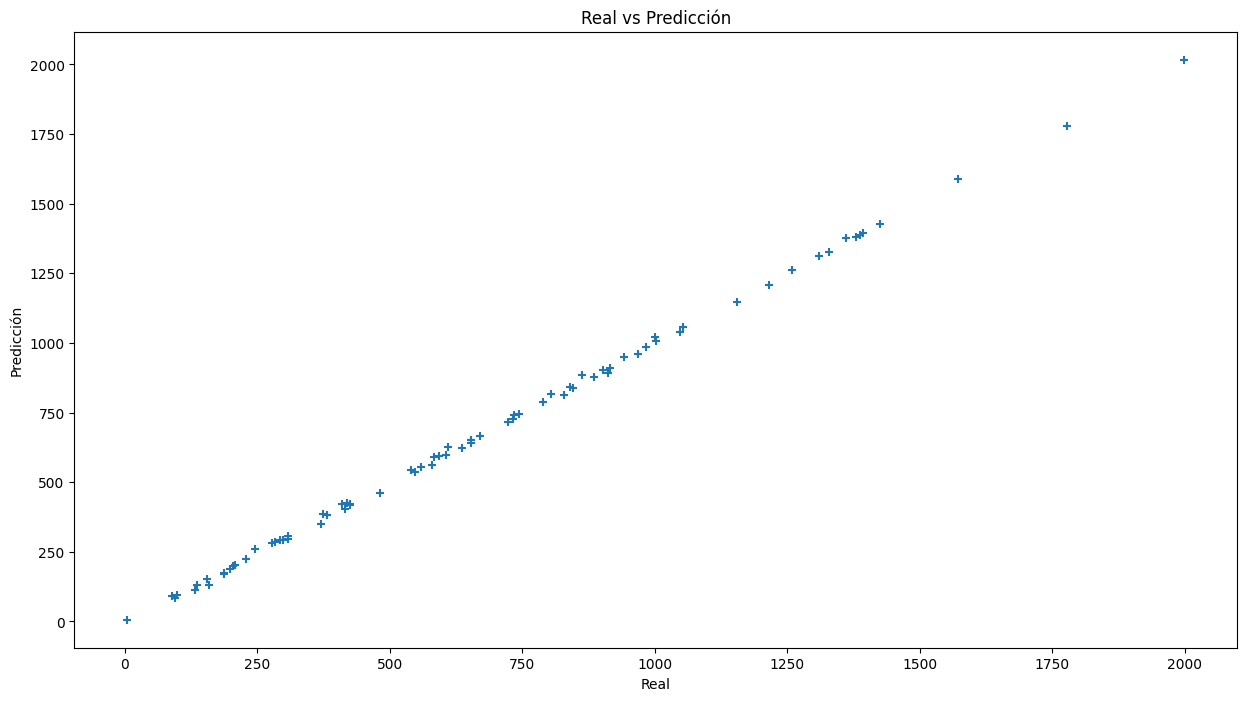

In [121]:
fig, ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,y_bal, marker="+")
ax.set_title("Real vs Predicción")
ax.set_ylabel("Predicción")
ax.set_xlabel("Real");

###  Crear un gráfico para observer los residuals entre los datos de prueba vs los valores predichos.

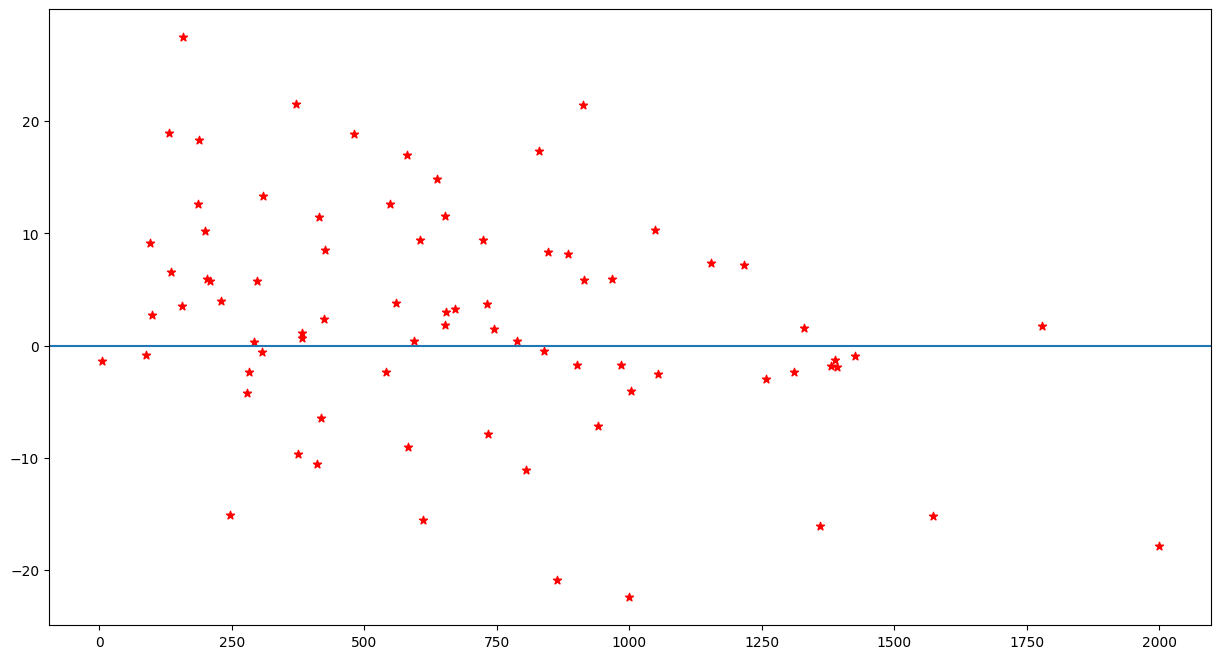

In [125]:
fig, ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test, (y_test-y_bal), color="red", marker="*")
ax.axhline(y=0);